In [28]:
import pandas as pd
import os
import numpy as np

LOW  = 0
MED = 1
HIGH = 2


In [29]:
fulldataset = pd.read_csv('./data/fulldataset.csv')


In [30]:
fulldataset.columns


Index(['rate', 'pktsize', 'L1-dcache-load-misses', 'L1-dcache-loads',
       'L1-dcache-stores', 'L1-icache-load-misses', 'LLC-load-misses',
       'LLC-loads', 'LLC-store-misses', 'LLC-stores', 'branch-load-misses',
       'branch-misses', 'branches', 'bus-cycles', 'cache-misses',
       'cache-references', 'context-switches', 'cpu-clock', 'cycles',
       'dTLB-load-misses', 'dTLB-store-misses', 'dTLB-stores',
       'iTLB-load-misses', 'iTLB-loads', 'instructions', 'minor-faults',
       'node-load-misses', 'node-loads', 'node-store-misses', 'node-stores',
       'page-faults', 'ref-cycles', 'task-clock'],
      dtype='object')

In [33]:
## Building the stats
dstats = {} # Stats for all the experiments, indexed by k (rate_pktsize)
totalstats=fulldataset.drop(["rate", "pktsize"], axis=1).describe() # Stats for all the dataset
partials = {}# Individual per-exp dataset
means = {} # Means for all features, indexed by f (feature)
varia = {} # Standard deviations for all features, indexed by f (feature)


for r in range (500,10001,500):
    for p in ["64", "256", "imix"]:
        k = str(r)+"_"+p
        dstats[k] = fulldataset.loc[fulldataset["rate"] == r].loc[fulldataset["pktsize"] == p].describe()
        partials[k] = (fulldataset.loc[fulldataset["rate"] == r].loc[fulldataset["pktsize"] == p]).drop(["rate", "pktsize"], axis=1)
        
        for f in dstats[k].columns:
            if (f not in means.keys()):
                means[f] = []               
            if (f not in varia.keys()):
                varia[f] = []
 
            means[f].append(dstats[k].loc["mean"][f])
            varia[f].append(dstats[k].loc["std"][f])

In [34]:
dstats

{'500_64':         rate  L1-dcache-load-misses  L1-dcache-loads  L1-dcache-stores  \
 count  290.0           2.900000e+02     2.900000e+02      2.900000e+02   
 mean   500.0           5.534511e+06     1.937768e+09      7.329349e+08   
 std      0.0           5.332734e+04     1.423083e+07      5.155421e+06   
 min    500.0           5.455866e+06     1.906922e+09      7.219274e+08   
 25%    500.0           5.500173e+06     1.941602e+09      7.343381e+08   
 50%    500.0           5.514696e+06     1.942874e+09      7.347423e+08   
 75%    500.0           5.539552e+06     1.944515e+09      7.353589e+08   
 max    500.0           5.716802e+06     2.006601e+09      7.586505e+08   
 
        L1-icache-load-misses  LLC-load-misses     LLC-loads  LLC-store-misses  \
 count             290.000000       290.000000  2.900000e+02        290.000000   
 mean            57714.975862      3911.286207  3.739592e+06       2615.103448   
 std              1829.447725      7364.057925  5.431349e+04       

In [35]:
#for index, row in fulldataset.iterrows():

normal_dataset = {}

for k in partials.keys():
    #normal_dataset[k] = ( (partials[k] - dstats[k].loc["mean"])/dstats[k].loc["std"] )# Wrong! As I'm normalizing per dataset and not fully
    normal_dataset[k] = ( (partials[k] - totalstats.loc["mean"] )/totalstats.loc["std"]  )
    #print (dstats[k].loc["mean"])
    #standard_fulldataset = 

In [36]:
normal_dataset["3500_256"].describe().loc["mean"]

L1-dcache-load-misses   -0.640274
L1-dcache-loads          0.478222
L1-dcache-stores        -0.372669
L1-icache-load-misses   -0.753896
LLC-load-misses          0.010459
LLC-loads               -0.641623
LLC-store-misses         0.226049
LLC-stores              -0.642026
branch-load-misses      -0.909586
branch-misses           -0.909330
branches                 0.471344
bus-cycles              -0.040788
cache-misses            -0.024968
cache-references        -0.641812
context-switches         0.009714
cpu-clock               -0.056659
cycles                  -0.041196
dTLB-load-misses        -0.422277
dTLB-store-misses       -0.373736
dTLB-stores             -0.372286
iTLB-load-misses        -0.117695
iTLB-loads              -0.073600
instructions             0.377398
minor-faults            -0.022656
node-load-misses        -0.462363
node-loads              -0.007145
node-store-misses       -0.005853
node-stores              0.199960
page-faults             -0.022656
ref-cycles    

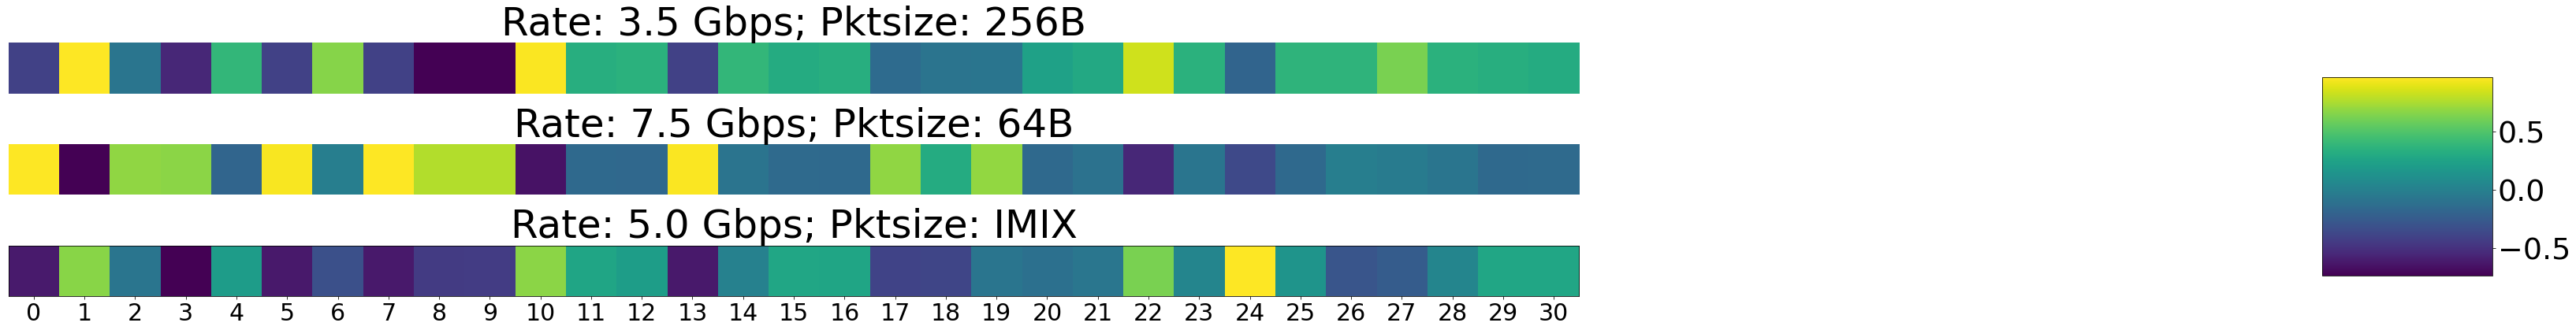

In [39]:
# Rebuild the three examples with the new data
import matplotlib.pyplot as plt

av = []
sv = []
mv = []
vshaped=[]

a = normal_dataset["3500_256"].describe()
b = normal_dataset["7500_64"].describe()
c = normal_dataset["5000_imix"].describe()

for i in [a,b,c]:
    av.append(i.loc["mean"])
    sv.append(i.loc["std"])
    mv.append(i.loc["max"])

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(60, 5))


im1 = ax1.imshow(av[0].values.reshape((1,31)))
im2 = ax2.imshow(av[1].values.reshape((1,31)))
im3 = ax3.imshow(av[2].values.reshape((1,31)))

ax1.axis('off')
ax2.axis('off')
#ax3.axis('off')
ax3.axes.get_yaxis().set_visible(False)

ax1.autoscale(False)
ax2.autoscale(False)
ax3.autoscale(False)
plt.tight_layout()


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im3, cax=cbar_ax)

plt.tick_params(labelsize=38)
#plt.labelsize(68)

ax1.set_title("Rate: 3.5 Gbps; Pktsize: 256B", size=50)
ax2.set_title("Rate: 7.5 Gbps; Pktsize: 64B", size=50)
ax3.set_title("Rate: 5.0 Gbps; Pktsize: IMIX", size=50)
plt.subplots_adjust(wspace=0.01,hspace=1)


plt.sca(ax3)
plt.xticks(range(31),  color='black', size=30)

plt.show()

fig.savefig("/tmp/foo.pdf", bbox_inches='tight')

In [128]:
av[0].reset_index()["feature"]

0     L1-dcache-load-misses
1           L1-dcache-loads
2          L1-dcache-stores
3     L1-icache-load-misses
4           LLC-load-misses
5                 LLC-loads
6          LLC-store-misses
7                LLC-stores
8        branch-load-misses
9             branch-misses
10                 branches
11               bus-cycles
12             cache-misses
13         cache-references
14         context-switches
15                cpu-clock
16                   cycles
17         dTLB-load-misses
18        dTLB-store-misses
19              dTLB-stores
20         iTLB-load-misses
21               iTLB-loads
22             instructions
23             minor-faults
24         node-load-misses
25               node-loads
26        node-store-misses
27              node-stores
28              page-faults
29               ref-cycles
30               task-clock
Name: feature, dtype: object

In [41]:
df = pd.DataFrame()
for r in range (500,10001,500):
    for p in ["64", "256", "imix"]:
        k = str(r)+"_"+p
        s = normal_dataset[k].describe().loc["mean"]
        s = s.rename(k)
        df = pd.concat([df, s], axis=1)
        #print (normal_dataset[k].describe().loc["mean"].drop(['time']) )

In [101]:
df.to_csv('~/git/data/ml-for-highspeed-networks/normalized_features.csv')

In [42]:
df

,500_64,500_256,500_imix,1000_64,1000_256,1000_imix,1500_64,1500_256,1500_imix,2000_64,...,8500_imix,9000_64,9000_256,9000_imix,9500_64,9500_256,9500_imix,10000_64,10000_256,10000_imix
L1-dcache-load-misses,-0.859641,-0.992771,-1.009198,-0.672966,-0.930268,-0.964209,-0.483057,-0.873694,-0.917288,-0.301441,...,-0.308177,2.434468,0.062868,-0.262847,2.658914,0.136246,-0.218094,2.828042,0.209286,-0.168792
L1-dcache-loads,1.439387,1.957545,2.067083,0.830940,1.631775,1.899982,0.426992,1.338404,1.607238,0.011374,...,-0.046995,-0.930393,-1.098505,-0.156161,-0.867609,-1.222331,-0.242717,-0.791087,-1.371159,-0.360824
L1-dcache-stores,0.545942,0.945519,1.042087,0.081102,0.639129,0.922118,-0.108497,0.355747,0.620408,-0.343188,...,-0.519285,2.485120,-1.362316,-0.588118,2.837515,-1.392697,-0.620219,3.215696,-1.458627,-0.706673
L1-icache-load-misses,-1.094179,-0.951914,-1.479907,-0.748272,-1.090256,-1.146423,-0.330256,-0.978456,-1.375656,0.208261,...,0.205001,1.941926,0.505517,0.406950,1.449064,0.426023,0.518361,0.756302,0.633180,0.697486
LLC-load-misses,-0.201315,0.127348,-0.030431,-0.016834,-0.029188,-0.085410,-0.143782,0.143722,-0.119192,-0.097282,...,-0.106814,0.097446,-0.043263,-0.043243,0.255413,0.299694,0.091362,0.024720,0.159650,0.106086
LLC-loads,-0.887154,-1.026607,-1.042935,-0.682182,-0.961028,-0.995421,-0.476005,-0.901145,-0.945784,-0.274250,...,-0.290185,2.439481,0.081898,-0.242794,2.645631,0.153387,-0.193531,2.851447,0.220561,-0.144139
LLC-store-misses,0.313499,0.779465,0.159756,0.204865,0.243101,-0.192825,0.222035,0.272734,-0.459834,0.232109,...,-0.459589,0.092223,0.194153,-0.282860,0.109666,0.162355,-0.391747,0.094226,0.184023,-0.387656
LLC-stores,-0.864200,-1.024712,-1.050563,-0.669610,-0.947800,-0.995832,-0.468342,-0.882466,-0.942387,-0.271145,...,-0.288221,2.429374,0.062414,-0.239177,2.623599,0.131325,-0.193188,2.817733,0.196797,-0.146136
branch-load-misses,-1.159170,-1.554784,-1.599240,-0.846868,-1.317791,-1.427609,-0.510381,-1.245324,-1.285295,-0.220308,...,0.254474,2.142063,0.258503,0.327774,1.686639,0.297282,0.402657,1.043476,0.301689,0.482245
branch-misses,-1.159245,-1.554854,-1.600009,-0.846582,-1.317581,-1.427646,-0.510085,-1.245287,-1.285275,-0.220590,...,0.254989,2.150965,0.259515,0.328577,1.687905,0.297686,0.402395,1.045015,0.301853,0.482347


In [155]:
a = normal_dataset["3500_256"].drop('time', axis=1)
b = normal_dataset["8000_64"].drop('time', axis=1)
c = normal_dataset["6000_imix"].drop('time', axis=1)

astr="3500_256"
bstr="8000_64"
cstr="6000_imix"



In [44]:
import math
vals = []

first = c.describe().loc["mean"]

for p in ["64", "256", "imix"]:
    for r in range (500,10001,500):
        k = str(r)+"_"+p
        tmp = normal_dataset[k].describe().loc["mean"]
        vals.append ( (k, sum(tmp*first)/ ( math.sqrt( sum(first*first) )*math.sqrt(sum(tmp*tmp))  )  )   )
    vals.append ((" ", " "))
    vals.append ((" ", " "))
for i,j in vals:
    print (i,j)        

500_64 -0.08742157469900041
1000_64 -0.2604158124316753
1500_64 -0.39214140943060716
2000_64 -0.44875608124312355
2500_64 -0.39550039279513965
3000_64 -0.1827181256885866
3500_64 -0.062319026048634145
4000_64 -0.028173774963972546
4500_64 0.042279959228434486
5000_64 0.13851017285700343
5500_64 0.19229003141092216
6000_64 0.25003123758244167
6500_64 0.3004228263695685
7000_64 0.398467208958008
7500_64 0.40590393899030053
8000_64 0.4494014145862165
8500_64 0.4779220362101563
9000_64 0.5143622786556884
9500_64 0.5165444519980069
10000_64 0.4825519764251377
   
   
500_256 0.06465473599880782
1000_256 -0.05018164758958845
1500_256 -0.110525629609123
2000_256 -0.21596835911864157
2500_256 -0.28627321493838775
3000_256 -0.3750956073190659
3500_256 -0.4436837838483354
4000_256 -0.4768077575837321
4500_256 -0.5715077341588132
5000_256 -0.6202070622269061
5500_256 -0.6175448080442303
6000_256 -0.6050308386447332
6500_256 -0.5118511237351632
7000_256 -0.510406676534965
7500_256 -0.4977188668925

In [45]:
labels = []

for p in ["64", "256", "imix"]:
    for r in range (500,10001,500):
        k = str(r)+"_"+p
        labels.append(k)

In [ ]:
vals = []
for i in labels:
    first = normal_dataset[i].describe().loc["mean"]
    inner = []
    for j in labels:
        tmp = normal_dataset[j].describe().loc["mean"]
        inner.append ( (j, sum(tmp*first)/ ( math.sqrt( sum(first*first) )*math.sqrt(sum(tmp*tmp))  )  )   )
    vals.append((i, inner))
    vals.append ((" ", []))
    vals.append ((" ", []))

In [ ]:
normal_dataset["500_64"].describe()